# 🚀 Laboratorio TECH: **Pandas + IA (Gemini con `GOOGLE_API_KEY`)**

> Mañana nos espera un **Laboratorio TECH**.  
> Vamos a aprender de forma sencilla y entretenida cómo usar **Pandas** para analizar datos con **modelos de Inteligencia Artificial**.  
> Tendremos **ejemplos guiados** y también momentos para que ustedes **experimenten y guarden su propio trabajo**.  
> La idea es que al final entiendan la teoría con la práctica, salgan con algo hecho por ustedes mismos y la **motivación para seguir creando**. 💡🔥

### ¿Qué haremos?
- Crear un pequeño mundo de datos (ventas de una tiendita) y analizarlo con **pandas**.
- Usar **Gemini** (vía `google-generativeai`) con tu **`GOOGLE_API_KEY`** para:
  - redactar **insights** a partir de agregados de pandas,
  - **clasificar** opiniones de clientes,
  - co‑crear **snippets** de matplotlib.
- Todo **100% práctico**, con explicaciones paso a paso.

In [3]:
# ===============================
# 0) Instalación de librerías
# ===============================
# pandas: análisis de datos tabulares
# matplotlib: gráficas simples
# google-generativeai: cliente oficial de Gemini (Google)
!pip -q install pandas matplotlib google-generativeai

In [2]:
# =============================================
# 1) Configurar tu GOOGLE_API_KEY (TU TURNO)
# =============================================
# Opción A (recomendada): define tu clave como variable de entorno en Colab.
#   - Ve a tu consola o al inicio del cuaderno y escribe:
#       %env GOOGLE_API_KEY=tu_clave_aqui
#
# Opción B: pegarla de forma oculta (no quedará visible en el cuaderno):
from getpass import getpass
import os
# Descomenta la siguiente línea para pegarla cuando corras la celda:
os.environ["GOOGLE_API_KEY"] = getpass("Pega tu GOOGLE_API_KEY aquí: ")

# Validar que existe una clave antes de seguir:
api_key = os.getenv("GOOGLE_API_KEY", "")
assert api_key, "⚠️ Define GOOGLE_API_KEY (con %env o getpass) antes de continuar."

# Configurar cliente de Gemini
import google.generativeai as genai
genai.configure(api_key=api_key)

# Elegimos un modelo rápido para taller
MODEL_NAME = "gemini-1.5-flash"
model = genai.GenerativeModel(MODEL_NAME)

# Helper para preguntar a la IA
def ask_gemini(prompt, temperature=0.6, json_mode=False):
    """
    Envia un prompt a Gemini y devuelve el texto de la respuesta.
    Si json_mode=True, se pide explicitamente que devuelva SOLO JSON.
    """
    if json_mode:
        prompt = prompt + "\n\nDevuelve SOLO JSON valido."
    response = model.generate_content(
        prompt,
        generation_config={"temperature": float(temperature)}
    )
    return response.text

Pega tu GOOGLE_API_KEY aquí: ··········


In [9]:
# =============================================
# 2) Generar datasets de ejemplo (TU TURNO)
# =============================================
import pandas as pd
from datetime import datetime, timedelta
import random

# TODO: fija la semilla para reproducibilidad
# random.seed(10)

# TODO: define lista de productos con (Producto, Categoría, PrecioLista, Costo)
productos = [
    ("Café", "Bebidas", 1.8, 0.9),
    ("Té", "Bebidas", 1.5, 0.7),
    ("Pastel de Chocolate", "Postres", 3.5, 1.5),
    ("Croissant", "Panadería", 2.0, 0.8),
    ("Sándwich de Jamón y Queso", "Comidas", 4.0, 2.0),
    ("Ensalada César", "Comidas", 5.0, 2.5),
    ("Jugo de Naranja", "Bebidas", 2.5, 1.0),
    ("Muffin de Arándanos", "Panadería", 2.2, 0.9),
    ("Galleta de Avena", "Postres", 1.0, 0.4),
    ("Agua Embotellada", "Bebidas", 1.2, 0.5),
]

# TODO: conviértelo a DataFrame y guarda a 'productos.csv'
df_prod = pd.DataFrame(productos, columns=["Producto","Categoría","PrecioLista","Costo"])
df_prod.to_csv("productos.csv", index=False)

# TODO: crea clientes C001..C050 con segmentos A/B/C y guarda 'clientes.csv'
n_clientes = 50
clientes = [(f"C{i:03d}", random.choice(["A","B","C"])) for i in range(1, n_clientes+1)]
df_cli = pd.DataFrame(clientes, columns=["ClienteID","Segmento"])
df_cli.to_csv("clientes.csv", index=False)

# TODO: genera fechas desde 2025-01-01 por 60 días
fechas = [datetime(2025, 1, 1) + timedelta(days=i) for i in range(60)]

comentarios_pool = [
    "Muy buen sabor", "Llegó un poco frío", "Excelente, me encantó",
    "Precio justo", "Demoró en llegar", "Atención amable",
    "Porciones pequeñas", "Sabor consistente", "Recomendado",
    "No estuvo tan fresco", "Me sorprendió", "Volveré a comprar", None, None
]

rows = []
for f in fechas:
    for _ in range(random.randint(8, 16)):
        # completa aquí la lógica (elige producto/cliente/hora, simula nulos, etc.)
        producto = random.choice(productos)
        cliente = random.choice(clientes)
        hora = random.randint(8, 20) # Simulate sales between 8 AM and 8 PM
        fecha_hora = f + timedelta(hours=hora, minutes=random.randint(0, 59), seconds=random.randint(0, 59))
        cantidad = random.randint(1, 3)
        precio = producto[2] # Use PrecioLista as the sale price for simplicity
        comentario = random.choice(comentarios_pool)
        rows.append({
            "FechaHora": fecha_hora,
            "ClienteID": cliente[0],
            "Producto": producto[0],
            "Categoría": producto[1],
            "Cantidad": cantidad,
            "Precio": precio,
            "Comentario_cliente": comentario
        })


df = pd.DataFrame(rows)
df.to_csv("ventas.csv", index=False)
print("Archivos generados: ventas.csv, productos.csv, clientes.csv (filas ventas:", len(df), ")")
df.head()

Archivos generados: ventas.csv, productos.csv, clientes.csv (filas ventas: 714 )


,FechaHora,ClienteID,Producto,Categoría,Cantidad,Precio,Comentario_cliente
0,2025-01-01 13:37:21,C007,Sándwich de Jamón y Queso,Comidas,3,4.0,No estuvo tan fresco
1,2025-01-01 20:21:12,C028,Ensalada César,Comidas,1,5.0,Precio justo
2,2025-01-01 10:51:29,C020,Galleta de Avena,Postres,2,1.0,Porciones pequeñas
3,2025-01-01 18:12:38,C050,Croissant,Panadería,2,2.0,Porciones pequeñas
4,2025-01-01 20:05:46,C043,Pastel de Chocolate,Postres,2,3.5,Llegó un poco frío


In [10]:
# =============================================
# 3) Cargar y explorar (TU TURNO)
# =============================================
import pandas as pd
df = pd.read_csv("ventas.csv")
df_prod = pd.read_csv("productos.csv")
df_cli = pd.read_csv("clientes.csv")
df["FechaHora"] = pd.to_datetime(df["FechaHora"])
df.info()
display(df.describe(include="all"))
df.isna().sum()
df["Categoría"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FechaHora           714 non-null    datetime64[ns]
 1   ClienteID           714 non-null    object        
 2   Producto            714 non-null    object        
 3   Categoría           714 non-null    object        
 4   Cantidad            714 non-null    int64         
 5   Precio              714 non-null    float64       
 6   Comentario_cliente  601 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 39.2+ KB


,FechaHora,ClienteID,Producto,Categoría,Cantidad,Precio,Comentario_cliente
count,714,714,714,714,714.000000,714.000000,601
unique,NaN,50,10,4,NaN,NaN,12
top,NaN,C045,Galleta de Avena,Bebidas,NaN,NaN,Volveré a comprar
freq,NaN,30,94,278,NaN,NaN,72
mean,2025-01-30 20:29:53.347339008,NaN,NaN,NaN,2.043417,2.322969,NaN
min,2025-01-01 08:42:37,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,2025-01-14 23:51:50,NaN,NaN,NaN,1.000000,1.275000,NaN
50%,2025-01-31 08:54:50,NaN,NaN,NaN,2.000000,2.000000,NaN
75%,2025-02-15 16:02:27.750000128,NaN,NaN,NaN,3.000000,3.500000,NaN
max,2025-03-01 19:42:36,NaN,NaN,NaN,3.000000,5.000000,NaN


,count
Categoría,
Bebidas,278
Postres,162
Panadería,154
Comidas,120


In [11]:
# =============================================
# 4) Limpieza + Features (TU TURNO)
# =============================================
df = df.dropna(subset=["Precio","Cantidad"]).copy()
df["Total"] = df["Precio"] * df["Cantidad"]
df["Dia"] = df["FechaHora"].dt.date.astype(str)
df["Hora"] = df["FechaHora"].dt.hour
df["Semana"] = df["FechaHora"].dt.isocalendar().week
df.head()

,FechaHora,ClienteID,Producto,Categoría,Cantidad,Precio,Comentario_cliente,Total,Dia,Hora,Semana
0,2025-01-01 13:37:21,C007,Sándwich de Jamón y Queso,Comidas,3,4.0,No estuvo tan fresco,12.0,2025-01-01,13,1
1,2025-01-01 20:21:12,C028,Ensalada César,Comidas,1,5.0,Precio justo,5.0,2025-01-01,20,1
2,2025-01-01 10:51:29,C020,Galleta de Avena,Postres,2,1.0,Porciones pequeñas,2.0,2025-01-01,10,1
3,2025-01-01 18:12:38,C050,Croissant,Panadería,2,2.0,Porciones pequeñas,4.0,2025-01-01,18,1
4,2025-01-01 20:05:46,C043,Pastel de Chocolate,Postres,2,3.5,Llegó un poco frío,7.0,2025-01-01,20,1


In [12]:
# =============================================
# 5) GroupBy esenciales (TU TURNO)
# =============================================
ingresos_cat = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
ingresos_prod = df.groupby("Producto")["Total"].sum().sort_values(ascending=False)
top5_u = df.groupby("Producto")["Cantidad"].sum().sort_values(ascending=False).head(5)
ingresos_cat, ingresos_prod.head(), top5_u

(Categoría
 Comidas      989.0
 Bebidas      974.9
 Postres      705.5
 Panadería    660.2
 Name: Total, dtype: float64,
 Producto
 Pastel de Chocolate          514.5
 Ensalada César               505.0
 Sándwich de Jamón y Queso    484.0
 Muffin de Arándanos          332.2
 Croissant                    328.0
 Name: Total, dtype: float64,
 Producto
 Galleta de Avena       191
 Agua Embotellada       175
 Café                   168
 Croissant              164
 Muffin de Arándanos    151
 Name: Cantidad, dtype: int64)

In [13]:
# =============================================
# 6) Pivot & Resample (TU TURNO)
# =============================================
tabla = pd.pivot_table(df, index="Semana", columns="Categoría", values="Total", aggfunc="sum")
diario = df.set_index("FechaHora")["Total"].resample("D").sum()
tabla.head(), diario.head()

(Categoría  Bebidas  Comidas  Panadería  Postres
 Semana                                         
 1            108.5    118.0       39.8     43.0
 2            125.0    127.0       74.4     63.0
 3            116.8     94.0       98.4    116.0
 4            116.3     95.0       75.8     63.5
 5             86.0    149.0       68.4     65.5,
 FechaHora
 2025-01-01    67.7
 2025-01-02    45.9
 2025-01-03    50.3
 2025-01-04    80.2
 2025-01-05    65.2
 Freq: D, Name: Total, dtype: float64)

In [14]:
# =============================================
# 7) Joins (TU TURNO)
# =============================================
dfm = df.merge(df_prod, on="Producto", how="left")
dfm["MargenUnitario"] = dfm["Precio"] - dfm["Costo"]
dfm["Margen"] = dfm["MargenUnitario"] * dfm["Cantidad"]
dfm = dfm.merge(df_cli, on="ClienteID", how="left")
dfm.head()

,FechaHora,ClienteID,Producto,Categoría_x,Cantidad,Precio,Comentario_cliente,Total,Dia,Hora,Semana,Categoría_y,PrecioLista,Costo,MargenUnitario,Margen,Segmento
0,2025-01-01 13:37:21,C007,Sándwich de Jamón y Queso,Comidas,3,4.0,No estuvo tan fresco,12.0,2025-01-01,13,1,Comidas,4.0,2.0,2.0,6.0,A
1,2025-01-01 20:21:12,C028,Ensalada César,Comidas,1,5.0,Precio justo,5.0,2025-01-01,20,1,Comidas,5.0,2.5,2.5,2.5,C
2,2025-01-01 10:51:29,C020,Galleta de Avena,Postres,2,1.0,Porciones pequeñas,2.0,2025-01-01,10,1,Postres,1.0,0.4,0.6,1.2,B
3,2025-01-01 18:12:38,C050,Croissant,Panadería,2,2.0,Porciones pequeñas,4.0,2025-01-01,18,1,Panadería,2.0,0.8,1.2,2.4,B
4,2025-01-01 20:05:46,C043,Pastel de Chocolate,Postres,2,3.5,Llegó un poco frío,7.0,2025-01-01,20,1,Postres,3.5,1.5,2.0,4.0,A


In [16]:
# =============================================
# 8) Ranking & Ventanas (TU TURNO)
# =============================================
res = df.groupby(["Categoría","Producto"])["Total"].sum().reset_index()
res["RankCat"] = res.groupby("Categoría")["Total"].rank(ascending=False, method="dense")
res.sort_values(["Categoría","RankCat","Total"], inplace=True)
res.head(10)
diario = df.set_index("FechaHora")["Total"].resample("D").sum()
mm7 = diario.rolling(7).mean()

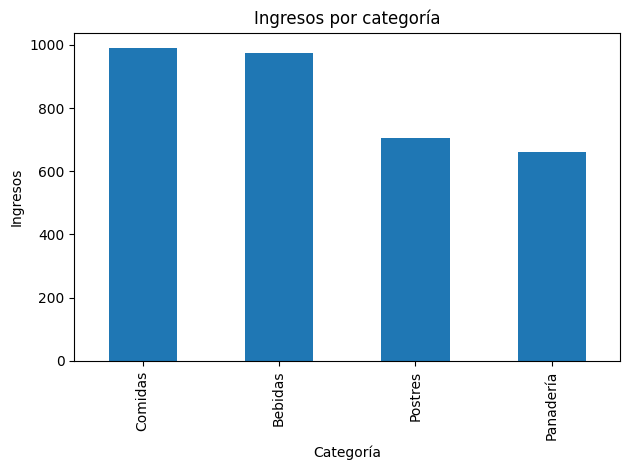

In [17]:
# =============================================
# 9) Gráfica única (TU TURNO)
# =============================================
import matplotlib.pyplot as plt
serie = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
plt.figure()
serie.plot(kind="bar")
plt.title("Ingresos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingresos")
plt.tight_layout()
plt.show()

In [18]:
# =============================================
# 10) IA — Insights desde pandas (TU TURNO)
# =============================================
resumen_cat = df.groupby("Categoría")["Total"].sum().sort_values(ascending=False)
texto = resumen_cat.to_string()
prompt = f"""
Actúa como analista. Con estos datos agregados:
- Escribe 3 insights accionables (con verbo)
- Propón 2 hipótesis a validar
- Sugiere 2 visualizaciones simples (y por qué)
DATOS:
{texto}
"""
print(ask_gemini(prompt, temperature=0.5))

**Insights accionables:**

1. **Priorizar** la promoción de Comidas y Bebidas:  Dado que Comidas y Bebidas representan casi el 50% de las ventas totales, se debe priorizar la promoción y optimización de estas categorías para maximizar el retorno de la inversión.

2. **Analizar** el rendimiento de Postres y Panadería:  Aunque Postres y Panadería muestran ventas significativas, se requiere un análisis más profundo para determinar si su rendimiento es óptimo considerando su potencial.  Se debe investigar si existen oportunidades para aumentar las ventas a través de promociones, nuevos productos o mejoras en la presentación.

3. **Desarrollar** estrategias de upselling y cross-selling:  Se debe explorar la posibilidad de incrementar las ventas promedio por cliente mediante estrategias de upselling (ofrecer opciones más caras) y cross-selling (ofrecer productos complementarios) especialmente entre las categorías de Comidas, Bebidas y Postres.


**Hipótesis a validar:**

1. **Hipótesis:** Un

In [20]:
# =============================================
# 11) IA — Clasificar comentarios (TU TURNO, salida JSON)
# =============================================
comentarios = "\n".join(df["Comentario_cliente"].dropna().tolist())
prompt = f"""
Clasifica cada comentario en positivo, negativo o neutral.
Devuelve SOLO JSON con claves 'positivo', 'negativo', 'neutral' y listas de comentarios.

COMENTARIOS:
{comentarios}
"""
salida = ask_gemini(prompt, temperature=0.3, json_mode=True)
print(salida)
import json
data = json.loads(salida)
list(data.keys())

```json
{
  "positivo": [
    "Precio justo",
    "Volveré a comprar",
    "Sabor consistente",
    "Me sorprendió",
    "Precio justo",
    "Volveré a comprar",
    "Sabor consistente",
    "Muy buen sabor",
    "Recomendado",
    "Volveré a comprar",
    "Atención amable",
    "Volveré a comprar",
    "Excelente, me encantó",
    "Sabor consistente",
    "Recomendado",
    "Muy buen sabor",
    "Excelente, me encantó",
    "Precio justo",
    "Me sorprendió",
    "Recomendado",
    "Muy buen sabor",
    "Excelente, me encantó",
    "Volveré a comprar",
    "Excelente, me encantó",
    "Excelente, me encantó",
    "Precio justo",
    "Excelente, me encantó",
    "Sabor consistente",
    "Volveré a comprar",
    "Me sorprendió",
    "Sabor consistente",
    "Me sorprendió",
    "Muy buen sabor",
    "Atención amable",
    "Volveré a comprar",
    "Volveré a comprar",
    "Me sorprendió",
    "Recomendado",
    "Precio justo",
    "Precio justo",
    "Precio justo",
    "Muy buen sabor"

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [23]:
# =============================================
# 12) IA — Copiloto de código Matplotlib (TU TURNO)
# =============================================
contexto = "Quiero graficar mi serie 'serie' de ingresos por categoría."
prompt = f"""
Con este contexto: {contexto}
Devuélveme SOLO un snippet de Python listo para pegar en Colab que:
- Use matplotlib
- Una sola figura
- Sin estilos ni colores personalizados
- Con título, ejes y 'tight_layout()'
"""
print(ask_gemini(prompt))

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
plt.plot(serie)
plt.title('Ingresos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()

```



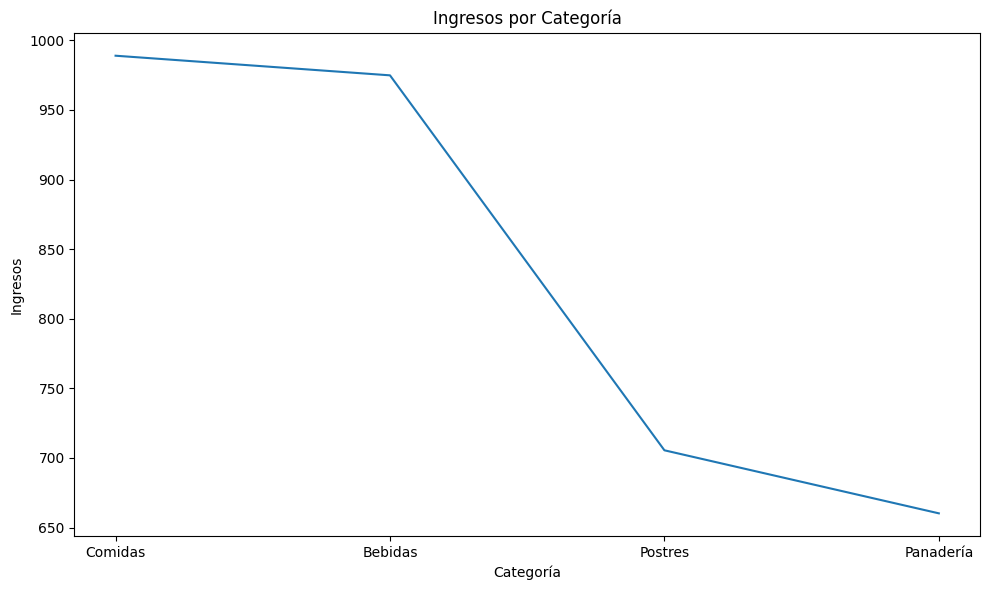

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ajusta el tamaño si es necesario
plt.plot(serie)
plt.title('Ingresos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ingresos')
plt.tight_layout()
plt.show()


## 13) Retos creativos (opcionales)
1) **Outliers (IQR)**: detecta días anómalos de ingreso.  
2) **Cohortes simples**: primer mes de compra por cliente y gasto total.  
3) **Franjas horarias**: Mañana/Tarde/Noche y top categoría por franja.

## 14) Cierre
- Un hallazgo con `groupby`/`pivot` y por qué importa.  
- Qué limpiaste y por qué fue razonable.  
- Una idea propuesta por la IA que valga la pena testear.